# Dimensionality Reduction for Data Visualisation Using Nature-Inspired Algorithms

## Project Summary

This project addresses the challenge of interpreting high-dimensional data by applying **Nature-Inspired Metaheuristic Algorithms** for **Dimensionality Reduction**. The aim is to project complex datasets into 2D space for enhanced visualisation and interpretation, comparing the results with traditional methods like **PCA** and **t-SNE**.

## Algorithms Used

We implemented and evaluated six computational intelligence (CI) approaches for dimensionality reduction:

1. **ABC (Artificial Bee Colony) Algorithm**  
   Mimics the intelligent foraging behavior of honey bees to optimize the projection of high-dimensional data.

2. **PSO (Particle Swarm Optimization)**  
   Inspired by the social behavior of birds and fish, PSO finds optimal projections by simulating particles searching the space.

3. **BA (Bat Algorithm)**  
   Simulates echolocation behavior of bats to find optimal low-dimensional representations.

4. **ACO (Ant Colony Optimization)**  
   Models the foraging path of ants to iteratively build reduced feature mappings.

5. **Firefly Algorithm**  
   Inspired by the flashing behavior of fireflies, this algorithm reduces dimensionality based on attraction and brightness (fitness).

6. **SOM (Self-Organizing Map)**  
   A neural-network-based unsupervised method that preserves topological features of the input space in 2D visual maps.

## Traditional Comparison Methods

- **PCA (Principal Component Analysis)** – Linear dimensionality reduction based on eigen decomposition.
- **t-SNE (t-distributed Stochastic Neighbor Embedding)** – A nonlinear method that models local similarities for better cluster separation.

## Evaluation

Each algorithm's output was evaluated using:
- **Scatter plots** for visual inspection of clusters.
- **Silhouette Score** and **Trustworthiness** for quantifying clustering quality and neighborhood preservation.
- **Execution time** for computational efficiency.

> This comparative study demonstrates how nature-inspired techniques can offer competitive—and sometimes superior—visual insights compared to traditional methods.


### *Import Required Libraries*
> We begin by importing the necessary libraries for data manipulation, visualization, clustering, and implementing the ABC algorithm.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from mpl_toolkits.mplot3d import Axes3D
import random
import time
import warnings
import joblib
warnings.filterwarnings('ignore')

> Set random seed for reproducibility

In [ ]:
np.random.seed(42)
random.seed(42)

### *Load and Explore the Wine Dataset*
> The Wine dataset contains chemical analysis results of wines grown in the same region in Italy but derived from three different cultivars.

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

> Display dataset information

In [ ]:
print(f"Dataset shape: {X.shape}")

Dataset shape: (178, 13)


In [ ]:
print(f"Number of classes: {len(np.unique(y))}")

Number of classes: 3


In [ ]:
print(f"Features: {feature_names}")

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


> Create a DataFrame for easier data manipulation

In [ ]:
wine_df = pd.DataFrame(X, columns=feature_names)
wine_df['target'] = y

> Display the first few rows of the dataset

In [ ]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### *Basic Exploratory Data Analysis*
> Basic statistical summary & Info

In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


> Visualize Class Distribution

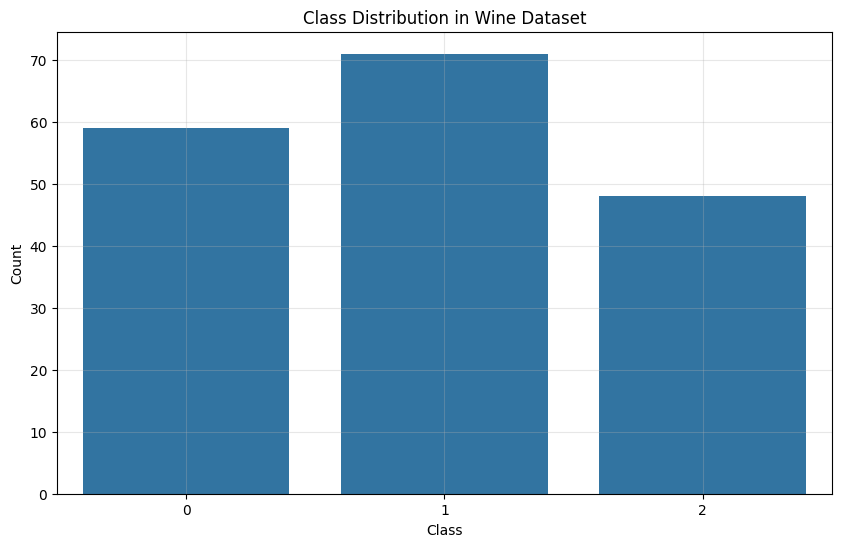

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=wine_df)
plt.title('Class Distribution in Wine Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

> Correlation Heatmap

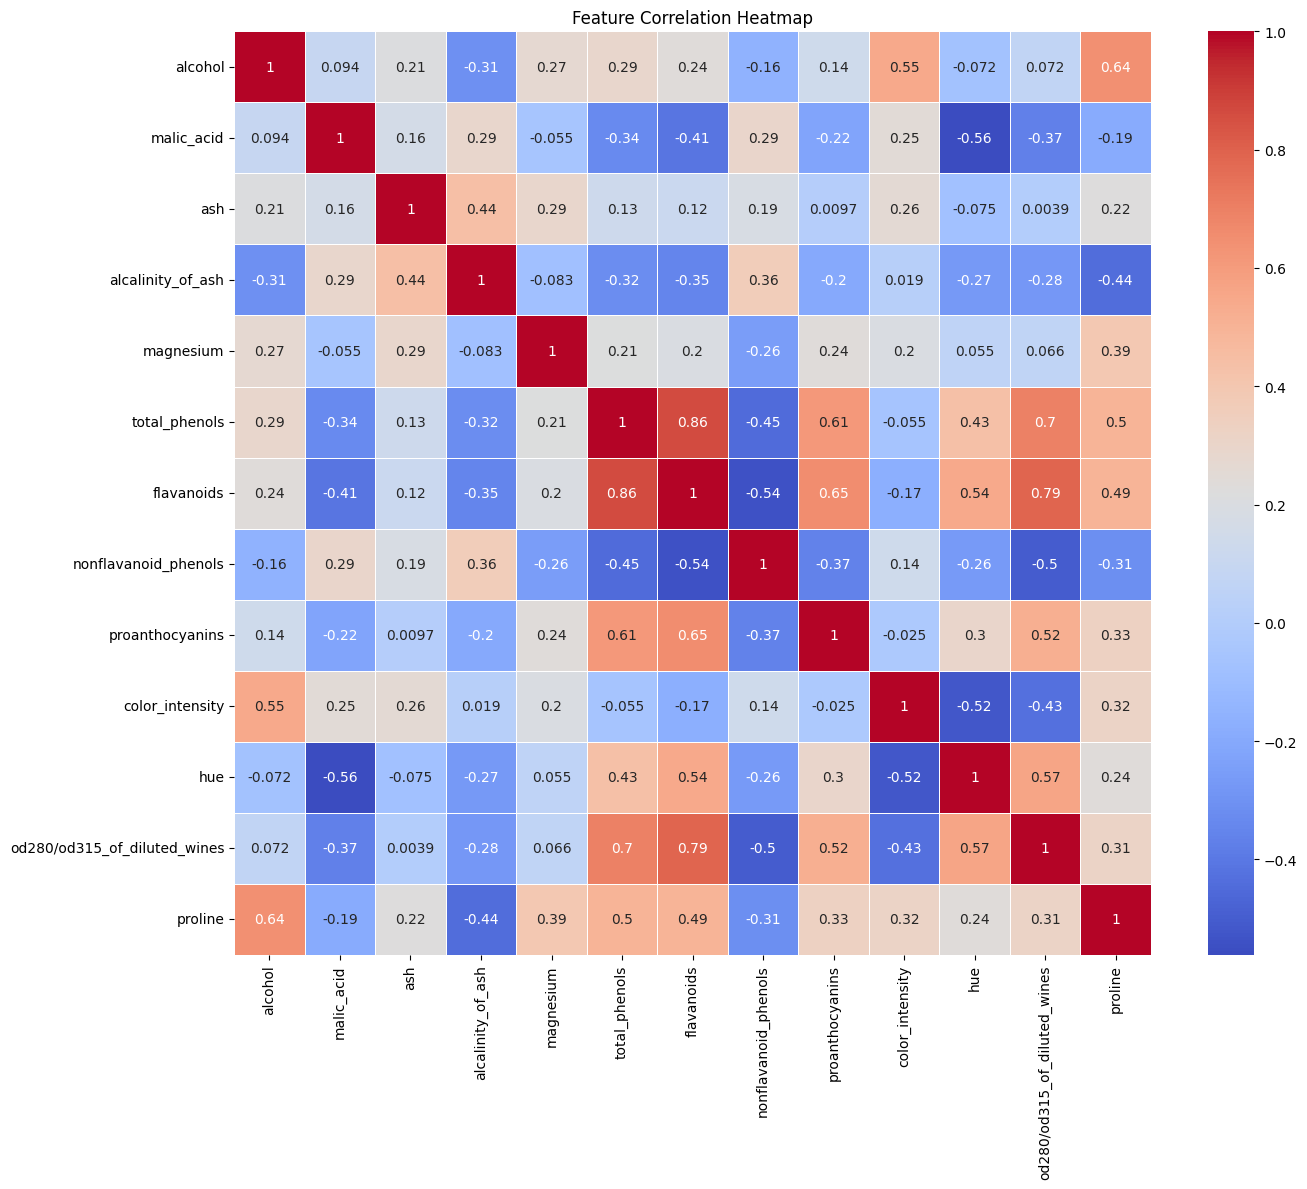

In [ ]:
plt.figure(figsize=(14, 12))
correlation_matrix = wine_df.drop('target', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

### *Data Standardization*

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

> Data before standardization (first 2 rows)

In [ ]:
X[:2]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03]])

> Data after standardization (first 2 rows)

In [ ]:
X_scaled[:2]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152]])

### *ABCDimensionalityReduction Class Definition*

In [ ]:
class ABCDimensionalityReduction:
    """
    Artificial Bee Colony algorithm for dimensionality reduction
    """
    def __init__(self, n_components=2, colony_size=50, max_iter=100, limit=20):
        """
        Initialize the ABC algorithm for dimensionality reduction

        Parameters:
        -----------
        n_components : int
            Number of components in the reduced space (default: 2)
        colony_size : int
            Size of the bee colony (default: 50)
        max_iter : int
            Maximum number of iterations (default: 100)
        limit : int
            Maximum number of trials before abandoning a food source (default: 20)
        """
        self.n_components = n_components
        self.colony_size = colony_size
        self.max_iter = max_iter
        self.limit = limit
        self.best_solution = None
        self.best_fitness = float('inf')
        self.fitness_history = []

    def fit_transform(self, X):
        """
        Fit the ABC algorithm to the data and transform it to lower dimensions

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Input data

        Returns:
        --------
        X_transformed : array-like, shape (n_samples, n_components)
            Transformed data in the lower-dimensional space
        """
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialize the bee colony
        self._initialize_colony()

        # Main ABC algorithm loop
        for iteration in range(self.max_iter):
            # Employed bees phase
            self._employed_bees_phase()

            # Calculate probabilities for onlooker bees
            self._calculate_probabilities()

            # Onlooker bees phase
            self._onlooker_bees_phase()

            # Scout bees phase
            self._scout_bees_phase()

            # Store the best fitness
            self.fitness_history.append(self.best_fitness)

            # Print progress every 10 iterations
            if (iteration + 1) % 10 == 0:
                print(f"Iteration {iteration + 1}/{self.max_iter}, Best Fitness: {self.best_fitness:.4f}")

        # Transform the data using the best solution
        return self._transform(self.X)

    def _initialize_colony(self):
        """Initialize the bee colony with random projection matrices"""
        self.colony = []
        self.trials = np.zeros(self.colony_size)

        for i in range(self.colony_size):
            # Generate a random projection matrix
            projection_matrix = np.random.uniform(-1, 1, (self.n_features, self.n_components))

            # Normalize the columns of the projection matrix
            for j in range(self.n_components):
                projection_matrix[:, j] = projection_matrix[:, j] / np.sqrt(np.sum(projection_matrix[:, j]**2))

            # Calculate fitness
            fitness = self._calculate_fitness(projection_matrix)

            # Store the solution
            self.colony.append({
                'projection_matrix': projection_matrix,
                'fitness': fitness
            })

            # Update the best solution
            if fitness < self.best_fitness:
                self.best_fitness = fitness
                self.best_solution = projection_matrix.copy()

    def _employed_bees_phase(self):
        """Employed bees phase of the ABC algorithm"""
        for i in range(self.colony_size):
            # Generate a neighbor solution
            neighbor_idx = i
            while neighbor_idx == i:
                neighbor_idx = random.randint(0, self.colony_size - 1)

            # Generate a new solution
            new_projection_matrix = self.colony[i]['projection_matrix'].copy()

            # Modify one dimension
            dim = random.randint(0, self.n_features - 1)
            phi = random.uniform(-1, 1)
            new_projection_matrix[dim] = self.colony[i]['projection_matrix'][dim] + phi * (
                self.colony[i]['projection_matrix'][dim] - self.colony[neighbor_idx]['projection_matrix'][dim]
            )

            # Normalize the columns of the projection matrix
            for j in range(self.n_components):
                new_projection_matrix[:, j] = new_projection_matrix[:, j] / np.sqrt(np.sum(new_projection_matrix[:, j]**2))

            # Calculate fitness
            new_fitness = self._calculate_fitness(new_projection_matrix)

            # Greedy selection
            if new_fitness < self.colony[i]['fitness']:
                self.colony[i]['projection_matrix'] = new_projection_matrix
                self.colony[i]['fitness'] = new_fitness
                self.trials[i] = 0

                # Update the best solution
                if new_fitness < self.best_fitness:
                    self.best_fitness = new_fitness
                    self.best_solution = new_projection_matrix.copy()
            else:
                self.trials[i] += 1

    def _calculate_probabilities(self):
        """Calculate probabilities for onlooker bees"""
        fitness_values = np.array([bee['fitness'] for bee in self.colony])
        min_fitness = np.min(fitness_values)
        relative_fitness = 0.9 * (fitness_values - min_fitness) / (np.max(fitness_values) - min_fitness + 1e-10) + 0.1
        self.probabilities = 1 / relative_fitness
        self.probabilities = self.probabilities / np.sum(self.probabilities)

    def _onlooker_bees_phase(self):
        """Onlooker bees phase of the ABC algorithm"""
        i = 0
        onlooker_count = 0

        # Distribute onlooker bees according to food source quality
        while onlooker_count < self.colony_size:
            if random.random() < self.probabilities[i]:
                onlooker_count += 1

                # Generate a neighbor solution
                neighbor_idx = i
                while neighbor_idx == i:
                    neighbor_idx = random.randint(0, self.colony_size - 1)

                # Generate a new solution
                new_projection_matrix = self.colony[i]['projection_matrix'].copy()

                # Modify one dimension
                dim = random.randint(0, self.n_features - 1)
                phi = random.uniform(-1, 1)
                new_projection_matrix[dim] = self.colony[i]['projection_matrix'][dim] + phi * (
                    self.colony[i]['projection_matrix'][dim] - self.colony[neighbor_idx]['projection_matrix'][dim]
                )

                # Normalize the columns of the projection matrix
                for j in range(self.n_components):
                    new_projection_matrix[:, j] = new_projection_matrix[:, j] / np.sqrt(np.sum(new_projection_matrix[:, j]**2))

                # Calculate fitness
                new_fitness = self._calculate_fitness(new_projection_matrix)

                # Greedy selection
                if new_fitness < self.colony[i]['fitness']:
                    self.colony[i]['projection_matrix'] = new_projection_matrix
                    self.colony[i]['fitness'] = new_fitness
                    self.trials[i] = 0

                    # Update the best solution
                    if new_fitness < self.best_fitness:
                        self.best_fitness = new_fitness
                        self.best_solution = new_projection_matrix.copy()
                else:
                    self.trials[i] += 1

            i = (i + 1) % self.colony_size

    def _scout_bees_phase(self):
        """Scout bees phase of the ABC algorithm"""
        # Find abandoned food sources
        abandoned_idx = np.where(self.trials >= self.limit)[0]

        # Replace abandoned food sources with new ones
        for idx in abandoned_idx:
            # Generate a new random projection matrix
            projection_matrix = np.random.uniform(-1, 1, (self.n_features, self.n_components))

            # Normalize the columns of the projection matrix
            for j in range(self.n_components):
                projection_matrix[:, j] = projection_matrix[:, j] / np.sqrt(np.sum(projection_matrix[:, j]**2))

            # Calculate fitness
            fitness = self._calculate_fitness(projection_matrix)

            # Store the solution
            self.colony[idx] = {
                'projection_matrix': projection_matrix,
                'fitness': fitness
            }

            # Reset trials
            self.trials[idx] = 0

            # Update the best solution
            if fitness < self.best_fitness:
                self.best_fitness = fitness
                self.best_solution = projection_matrix.copy()

    def _calculate_fitness(self, projection_matrix):
        """
        Calculate the fitness of a solution

        The fitness is a combination of:
        1. Structure preservation - measured by trustworthiness
        2. Cluster preservation - measured by silhouette score
        """
        # Transform the data
        X_transformed = self.X @ projection_matrix

        # Calculate trustworthiness
        trustworthiness = self._calculate_trustworthiness(self.X, X_transformed, k=10)

        # Apply K-means clustering
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=1)
        kmeans.fit(X_transformed)
        labels = kmeans.labels_

        # Calculate silhouette score
        try:
            sil_score = silhouette_score(X_transformed, labels)
        except:
            sil_score = -1  # If only one cluster is found

        # Combined fitness (maximize trustworthiness and silhouette score)
        fitness = -0.7 * trustworthiness - 0.3 * sil_score

        return fitness

    def _calculate_trustworthiness(self, X_high, X_low, k=5):
        """
        Calculate the trustworthiness of a dimensionality reduction

        Parameters:
        -----------
        X_high : array-like, shape (n_samples, n_features)
            High-dimensional data
        X_low : array-like, shape (n_samples, n_components)
            Low-dimensional data
        k : int
            Number of nearest neighbors to consider (default: 5)

        Returns:
        --------
        trustworthiness : float
            Trustworthiness score (0-1)
        """
        n_samples = X_high.shape[0]

        # Find k-nearest neighbors in the high-dimensional space
        nn_high = NearestNeighbors(n_neighbors=k+1).fit(X_high)
        _, indices_high = nn_high.kneighbors(X_high)

        # Find k-nearest neighbors in the low-dimensional space
        nn_low = NearestNeighbors(n_neighbors=k+1).fit(X_low)
        _, indices_low = nn_low.kneighbors(X_low)

        # Calculate trustworthiness
        trustworthiness = 0
        for i in range(n_samples):
            # Get the k-nearest neighbors (excluding the point itself)
            neighbors_high = set(indices_high[i, 1:k+1])
            neighbors_low = set(indices_low[i, 1:k+1])

            # Find neighbors in the low-dimensional space that are not neighbors in the high-dimensional space
            non_neighbors_high = neighbors_low - neighbors_high

            # Calculate the penalty
            penalty = 0
            for j in non_neighbors_high:
                # Find the rank of j in the high-dimensional space
                rank = np.where(indices_high[i] == j)[0]
                if len(rank) > 0:
                    penalty += (rank[0] - k)

            trustworthiness += penalty

        # Normalize trustworthiness
        n = n_samples * k * (2 * n_samples - 3 * k - 1) / 2
        trustworthiness = 1 - trustworthiness / n

        return trustworthiness

    def _transform(self, X):
        """
        Transform the data using the best projection matrix

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Input data

        Returns:
        --------
        X_transformed : array-like, shape (n_samples, n_components)
            Transformed data in the lower-dimensional space
        """
        return X @ self.best_solution

### *Evaluation Function for Dimensionality Reduction*

In [ ]:
def evaluate_dimensionality_reduction(X, X_reduced, y=None, k=10):
    """
    Evaluate the quality of dimensionality reduction

    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        Original high-dimensional data
    X_reduced : array-like, shape (n_samples, n_components)
        Reduced low-dimensional data
    y : array-like, optional
        True labels for the data
    k : int
        Number of nearest neighbors for trustworthiness calculation

    Returns:
    --------
    metrics : dict
        Dictionary with evaluation metrics
    """
    # Calculate trustworthiness
    nn_high = NearestNeighbors(n_neighbors=k+1).fit(X)
    _, indices_high = nn_high.kneighbors(X)

    nn_low = NearestNeighbors(n_neighbors=k+1).fit(X_reduced)
    _, indices_low = nn_low.kneighbors(X_reduced)

    n_samples = X.shape[0]
    trustworthiness = 0

    for i in range(n_samples):
        neighbors_high = set(indices_high[i, 1:k+1])
        neighbors_low = set(indices_low[i, 1:k+1])
        common_neighbors = neighbors_high.intersection(neighbors_low)
        trustworthiness += len(common_neighbors) / k

    trustworthiness = trustworthiness / n_samples

    # Calculate silhouette score if y is provided
    sil_score = None
    if y is not None:
        sil_score = silhouette_score(X_reduced, y)

    return {
        'trustworthiness': trustworthiness,
        'silhouette_score': sil_score
    }

> Set parameters for the ABC algorithm

In [ ]:
n_components = 2  # Reduce to 2 dimensions for visualization
colony_size = 50
max_iter = 100
limit = 20  # Maximum number of trials before abandoning a food source

In [ ]:
print(f"Running ABC dimensionality reduction (colony_size={colony_size}, max_iter={max_iter})...")
start_time = time.time()
abc = ABCDimensionalityReduction(n_components=n_components, colony_size=colony_size, max_iter=max_iter, limit=limit)
X_abc = abc.fit_transform(X_scaled)
abc_time = time.time() - start_time
print(f"ABC completed in {abc_time:.2f} seconds")

Running ABC dimensionality reduction (colony_size=50, max_iter=100)...
Iteration 10/100, Best Fitness: -0.8784
Iteration 20/100, Best Fitness: -0.8886
Iteration 30/100, Best Fitness: -0.9009
Iteration 40/100, Best Fitness: -0.9028
Iteration 50/100, Best Fitness: -0.9031
Iteration 60/100, Best Fitness: -0.9031
Iteration 70/100, Best Fitness: -0.9031
Iteration 80/100, Best Fitness: -0.9031
Iteration 90/100, Best Fitness: -0.9031
Iteration 100/100, Best Fitness: -0.9031
ABC completed in 115.19 seconds


### *PCA for Comparison*

In [ ]:
print("Running PCA for comparison...")
start_time = time.time()
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
pca_time = time.time() - start_time
print(f"PCA completed in {pca_time:.2f} seconds")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

Running PCA for comparison...
PCA completed in 0.01 seconds
Explained variance ratio: [0.36198848 0.1920749 ]
Total explained variance: 0.5541


### *t-SNE for Comparison*

In [ ]:
print("Running t-SNE for comparison...")
start_time = time.time()
tsne = TSNE(n_components=n_components, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
tsne_time = time.time() - start_time
print(f"t-SNE completed in {tsne_time:.2f} seconds")

Running t-SNE for comparison...
t-SNE completed in 0.73 seconds


### *Evaluate Results*

In [ ]:
abc_metrics = evaluate_dimensionality_reduction(X_scaled, X_abc, y)
pca_metrics = evaluate_dimensionality_reduction(X_scaled, X_pca, y)
tsne_metrics = evaluate_dimensionality_reduction(X_scaled, X_tsne, y)

In [ ]:
print("\nEvaluation Metrics:")
print(f"ABC - Trustworthiness: {abc_metrics['trustworthiness']:.4f}, Silhouette Score: {abc_metrics['silhouette_score']:.4f}")
print(f"PCA - Trustworthiness: {pca_metrics['trustworthiness']:.4f}, Silhouette Score: {pca_metrics['silhouette_score']:.4f}")
print(f"t-SNE - Trustworthiness: {tsne_metrics['trustworthiness']:.4f}, Silhouette Score: {tsne_metrics['silhouette_score']:.4f}")


Evaluation Metrics:
ABC - Trustworthiness: 0.1669, Silhouette Score: 0.1853
PCA - Trustworthiness: 0.3697, Silhouette Score: 0.5262
t-SNE - Trustworthiness: 0.6067, Silhouette Score: 0.5520


### *Visualization - ABC Convergence*

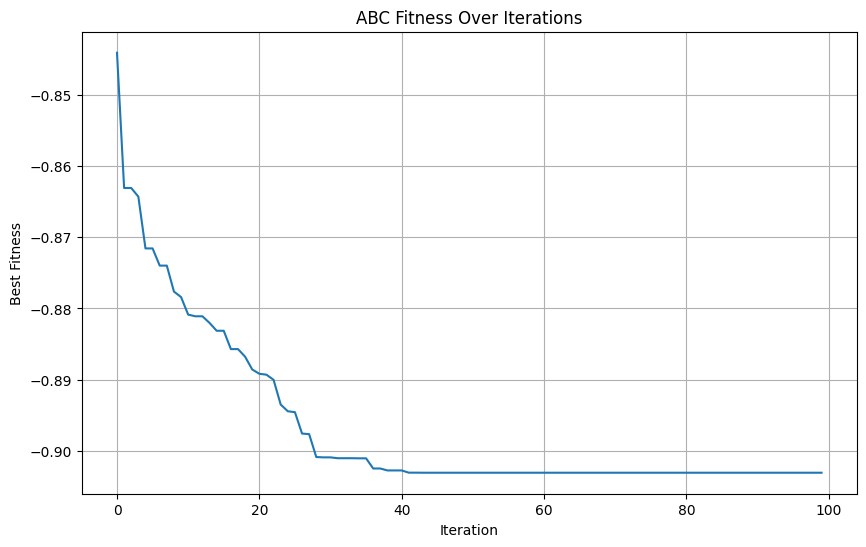

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(abc.fitness_history)
plt.title('ABC Fitness Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.grid(True)
plt.show()

### *Visualization - Results Comparison*

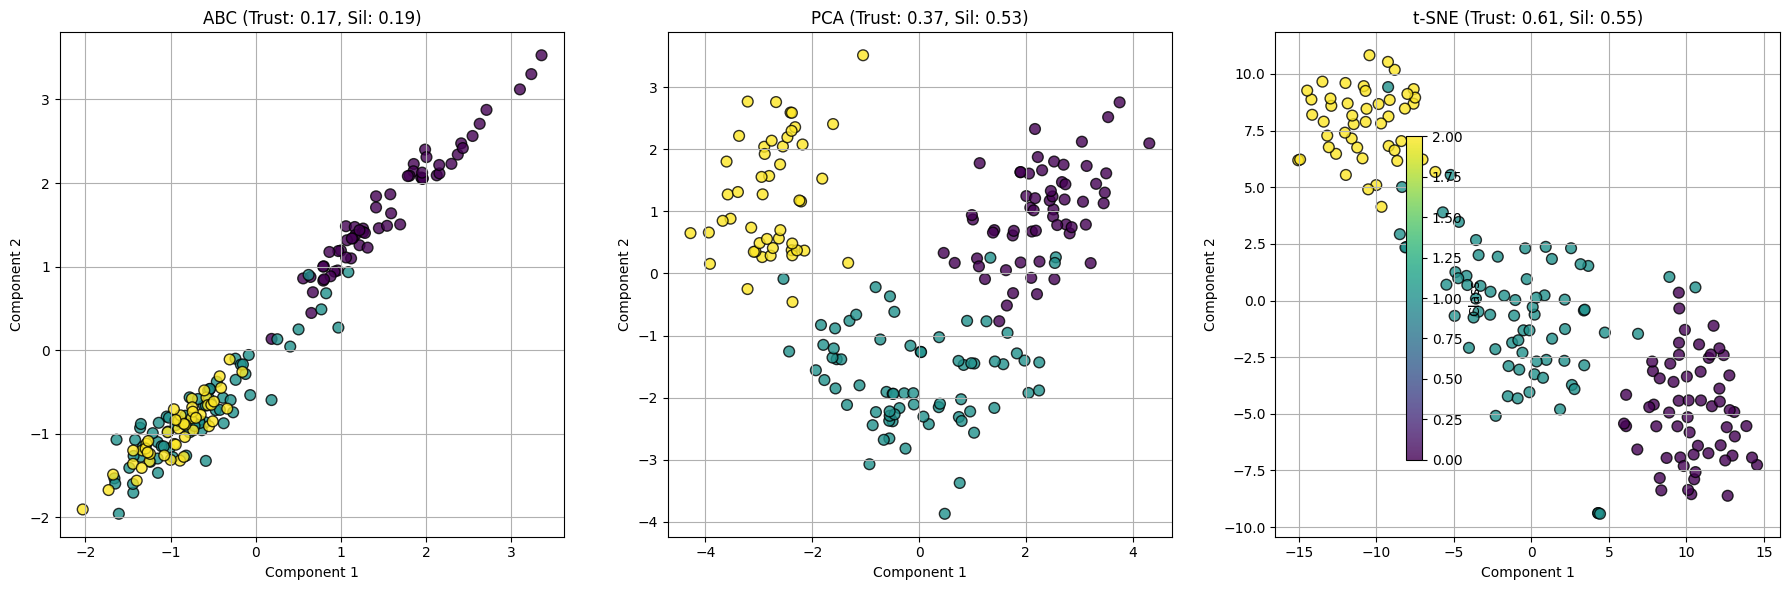

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# ABC plot
scatter = axes[0].scatter(X_abc[:, 0], X_abc[:, 1], c=y, cmap='viridis', edgecolor='k', s=60, alpha=0.8)
axes[0].set_title(f"ABC (Trust: {abc_metrics['trustworthiness']:.2f}, Sil: {abc_metrics['silhouette_score']:.2f})")
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')
axes[0].grid(True)

# PCA plot
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=60, alpha=0.8)
axes[1].set_title(f"PCA (Trust: {pca_metrics['trustworthiness']:.2f}, Sil: {pca_metrics['silhouette_score']:.2f})")
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')
axes[1].grid(True)

# t-SNE plot
axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=60, alpha=0.8)
axes[2].set_title(f"t-SNE (Trust: {tsne_metrics['trustworthiness']:.2f}, Sil: {tsne_metrics['silhouette_score']:.2f})")
axes[2].set_xlabel('Component 1')
axes[2].set_ylabel('Component 2')
axes[2].grid(True)

# Add a colorbar
cbar = fig.colorbar(scatter, ax=axes,orientation='vertical', shrink=0.7)
cbar.set_label('Class')

plt.tight_layout()
plt.show()

### *K-means Clustering on Reduced Data*
> Apply K-means clustering to the reduced data

In [ ]:
n_clusters = 3  # Number of clusters (same as the number of classes)

# ABC clustering
kmeans_abc = KMeans(n_clusters=n_clusters, random_state=42)
abc_clusters = kmeans_abc.fit_predict(X_abc)

# PCA clustering
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42)
pca_clusters = kmeans_pca.fit_predict(X_pca)

# t-SNE clustering
kmeans_tsne = KMeans(n_clusters=n_clusters, random_state=42)
tsne_clusters = kmeans_tsne.fit_predict(X_tsne)

### *Visualization - Clustering Results*

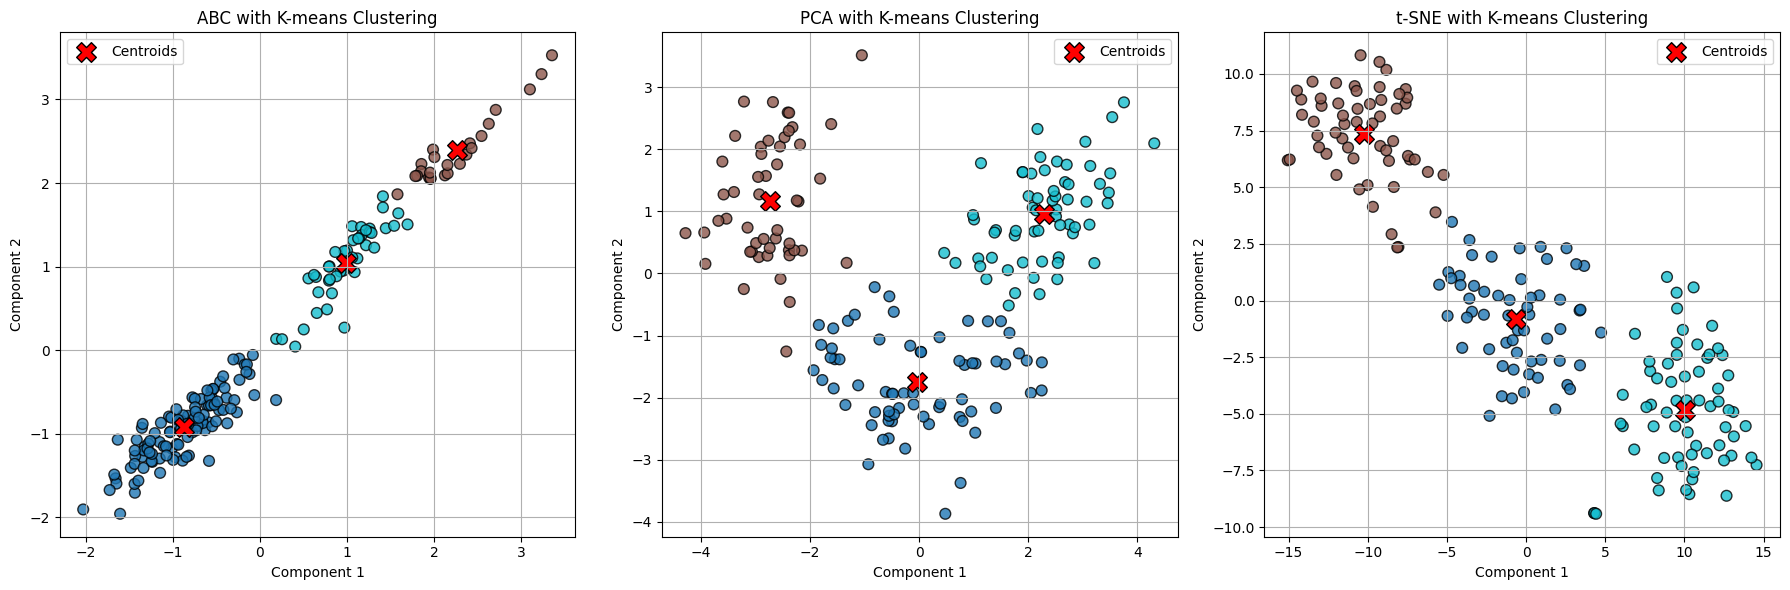

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# ABC clustering
axes[0].scatter(X_abc[:, 0], X_abc[:, 1], c=abc_clusters, cmap='tab10', edgecolor='k', s=60, alpha=0.8)
axes[0].scatter(kmeans_abc.cluster_centers_[:, 0], kmeans_abc.cluster_centers_[:, 1],
                c='red', marker='X', s=200, edgecolor='k', label='Centroids')
axes[0].set_title("ABC with K-means Clustering")
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')
axes[0].grid(True)
axes[0].legend()

# PCA clustering
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=pca_clusters, cmap='tab10', edgecolor='k', s=60, alpha=0.8)
axes[1].scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
                c='red', marker='X', s=200, edgecolor='k', label='Centroids')
axes[1].set_title("PCA with K-means Clustering")
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')
axes[1].grid(True)
axes[1].legend()

# t-SNE clustering
axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=tsne_clusters, cmap='tab10', edgecolor='k', s=60, alpha=0.8)
axes[2].scatter(kmeans_tsne.cluster_centers_[:, 0], kmeans_tsne.cluster_centers_[:, 1],
                c='red', marker='X', s=200, edgecolor='k', label='Centroids')
axes[2].set_title("t-SNE with K-means Clustering")
axes[2].set_xlabel('Component 1')
axes[2].set_ylabel('Component 2')
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()

### *Compare True Labels with Clustering Results*
>  Create a table to compare true labels with clustering results

In [ ]:
comparison_df = pd.DataFrame({
    'True_Label': y,
    'ABC_Cluster': abc_clusters,
    'PCA_Cluster': pca_clusters,
    'tSNE_Cluster': tsne_clusters
})

# Show the first few rows
comparison_df.head(10)

,True_Label,ABC_Cluster,PCA_Cluster,tSNE_Cluster
0,0,2,2,2
1,0,2,2,2
2,0,1,2,2
3,0,1,2,2
4,0,2,2,2
5,0,1,2,2
6,0,1,2,2
7,0,1,2,2
8,0,2,2,2
9,0,2,2,2


> Quantitative Comparison

In [ ]:
results = pd.DataFrame({
    'Method': ['ABC', 'PCA', 't-SNE'],
    'Trustworthiness': [abc_metrics['trustworthiness'], pca_metrics['trustworthiness'], tsne_metrics['trustworthiness']],
    'Silhouette Score': [abc_metrics['silhouette_score'], pca_metrics['silhouette_score'], tsne_metrics['silhouette_score']],
    'Execution Time (s)': [abc_time, pca_time, tsne_time]
})

# Display the results
results

,Method,Trustworthiness,Silhouette Score,Execution Time (s)
0,ABC,0.166854,0.185292,115.192106
1,PCA,0.369663,0.526154,0.010850
2,t-SNE,0.606742,0.552038,0.726211


### *Save Models and Results*
> Create a directory for outputs if it doesn't exist

In [ ]:
os.makedirs('outputs', exist_ok=True)

> Save the models

In [ ]:
joblib.dump(abc, 'outputs/abc_model.pkl')
joblib.dump(pca, 'outputs/pca_model.pkl')
joblib.dump(tsne, 'outputs/tsne_model.pkl')

['outputs/tsne_model.pkl']

> Save the results

In [ ]:
results.to_csv('outputs/dimensionality_reduction_results.csv', index=False)

> Save the transformed data

In [ ]:
np.save('outputs/X_abc.npy', X_abc)
np.save('outputs/X_pca.npy', X_pca)
np.save('outputs/X_tsne.npy', X_tsne)

print("Models and results saved to the 'outputs' directory.")

Models and results saved to the 'outputs' directory.


> Experiment with Different Parameters

In [ ]:
# Let's try different colony sizes
colony_sizes = [30, 50, 70]
max_iter = 50  # Reduced to save time

In [ ]:
results_params = []

for size in colony_sizes:
    print(f"\nRunning ABC with colony size = {size}")
    start_time = time.time()
    abc_test = ABCDimensionalityReduction(n_components=2, colony_size=size, max_iter=max_iter, limit=20)
    X_abc_test = abc_test.fit_transform(X_scaled)
    runtime = time.time() - start_time

    # Evaluate
    metrics = evaluate_dimensionality_reduction(X_scaled, X_abc_test, y)

    results_params.append({
        'Colony Size': size,
        'Best Fitness': abc_test.best_fitness,
        'Trustworthiness': metrics['trustworthiness'],
        'Silhouette Score': metrics['silhouette_score'],
        'Runtime (s)': runtime
    })


Running ABC with colony size = 30
Iteration 10/50, Best Fitness: -0.8930
Iteration 20/50, Best Fitness: -0.8960
Iteration 30/50, Best Fitness: -0.8978
Iteration 40/50, Best Fitness: -0.8978
Iteration 50/50, Best Fitness: -0.9000

Running ABC with colony size = 50
Iteration 10/50, Best Fitness: -0.8711
Iteration 20/50, Best Fitness: -0.8780
Iteration 30/50, Best Fitness: -0.8906
Iteration 40/50, Best Fitness: -0.8942
Iteration 50/50, Best Fitness: -0.8974

Running ABC with colony size = 70
Iteration 10/50, Best Fitness: -0.8938
Iteration 20/50, Best Fitness: -0.8960
Iteration 30/50, Best Fitness: -0.8995
Iteration 40/50, Best Fitness: -0.9016
Iteration 50/50, Best Fitness: -0.9018


In [ ]:
# Display the results
pd.DataFrame(results_params)

,Colony Size,Best Fitness,Trustworthiness,Silhouette Score,Runtime (s)
0,30,-0.900034,0.189888,0.179909,31.549019
1,50,-0.897394,0.174157,0.182791,53.151604
2,70,-0.901757,0.175843,0.224143,79.175393


> Visualize Parameter Impact

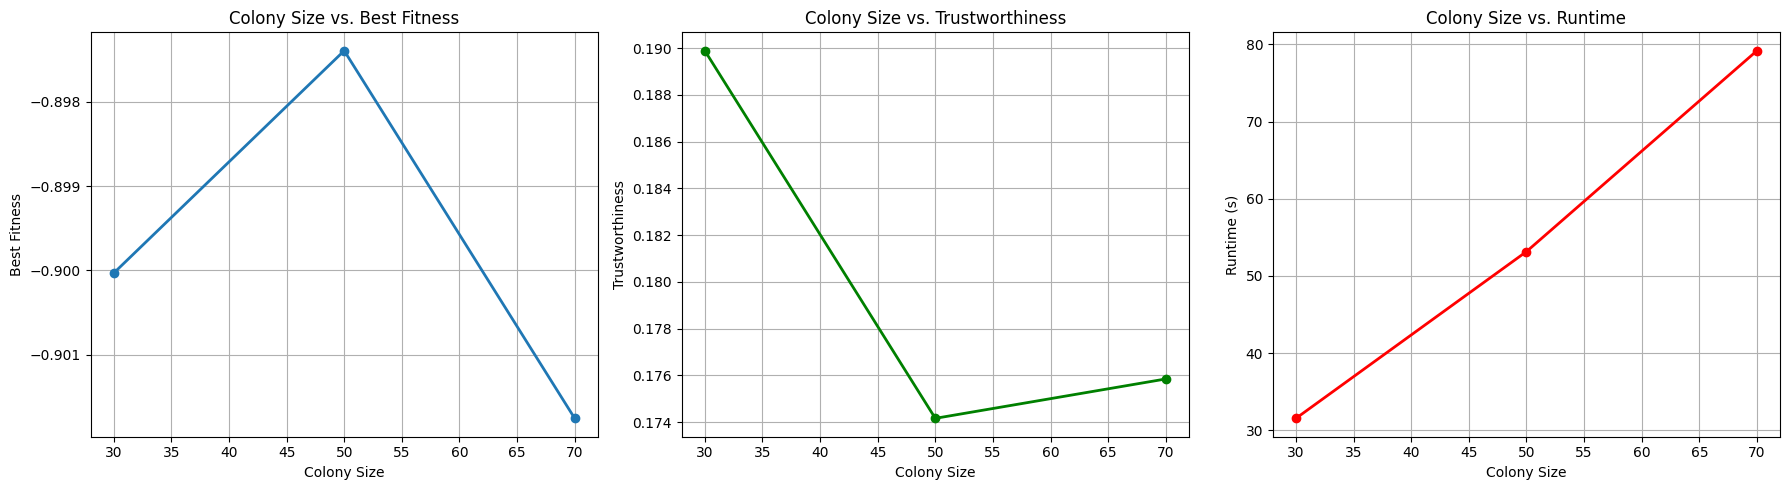

In [ ]:
# Plot the effect of colony size on metrics
results_df = pd.DataFrame(results_params)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Fitness
axes[0].plot(results_df['Colony Size'], results_df['Best Fitness'], marker='o', linewidth=2)
axes[0].set_title('Colony Size vs. Best Fitness')
axes[0].set_xlabel('Colony Size')
axes[0].set_ylabel('Best Fitness')
axes[0].grid(True)

# Trustworthiness
axes[1].plot(results_df['Colony Size'], results_df['Trustworthiness'], marker='o', linewidth=2, color='green')
axes[1].set_title('Colony Size vs. Trustworthiness')
axes[1].set_xlabel('Colony Size')
axes[1].set_ylabel('Trustworthiness')
axes[1].grid(True)

# Runtime
axes[2].plot(results_df['Colony Size'], results_df['Runtime (s)'], marker='o', linewidth=2, color='red')
axes[2].set_title('Colony Size vs. Runtime')
axes[2].set_xlabel('Colony Size')
axes[2].set_ylabel('Runtime (s)')
axes[2].grid(True)

plt.tight_layout()
plt.show()

### *Try 3D Visualization*
> Set up ABC for 3D visualization

In [ ]:
abc_3d = ABCDimensionalityReduction(n_components=3, colony_size=50, max_iter=80, limit=20)
X_abc_3d = abc_3d.fit_transform(X_scaled)

Iteration 10/80, Best Fitness: -0.8711
Iteration 20/80, Best Fitness: -0.8891
Iteration 30/80, Best Fitness: -0.8932
Iteration 40/80, Best Fitness: -0.8945
Iteration 50/80, Best Fitness: -0.8945
Iteration 60/80, Best Fitness: -0.8947
Iteration 70/80, Best Fitness: -0.8961
Iteration 80/80, Best Fitness: -0.8974


> Apply PCA for 3D visualization

In [ ]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

> Apply t-SNE for 3D visualization

In [ ]:
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

> Evaluate the 3D projections

In [ ]:
abc_3d_metrics = evaluate_dimensionality_reduction(X_scaled, X_abc_3d, y)
pca_3d_metrics = evaluate_dimensionality_reduction(X_scaled, X_pca_3d, y)
tsne_3d_metrics = evaluate_dimensionality_reduction(X_scaled, X_tsne_3d, y)

print("\n3D Projection Metrics:")
print(f"ABC 3D - Trustworthiness: {abc_3d_metrics['trustworthiness']:.4f}, Silhouette Score: {abc_3d_metrics['silhouette_score']:.4f}")
print(f"PCA 3D - Trustworthiness: {pca_3d_metrics['trustworthiness']:.4f}, Silhouette Score: {pca_3d_metrics['silhouette_score']:.4f}")
print(f"t-SNE 3D - Trustworthiness: {tsne_3d_metrics['trustworthiness']:.4f}, Silhouette Score: {tsne_3d_metrics['silhouette_score']:.4f}")


3D Projection Metrics:
ABC 3D - Trustworthiness: 0.2545, Silhouette Score: 0.5733
PCA 3D - Trustworthiness: 0.4983, Silhouette Score: 0.4366
t-SNE 3D - Trustworthiness: 0.6837, Silhouette Score: 0.4746


### *3D Visualization of Dimensionality Reduction Results*
> Create figure for 3D plots

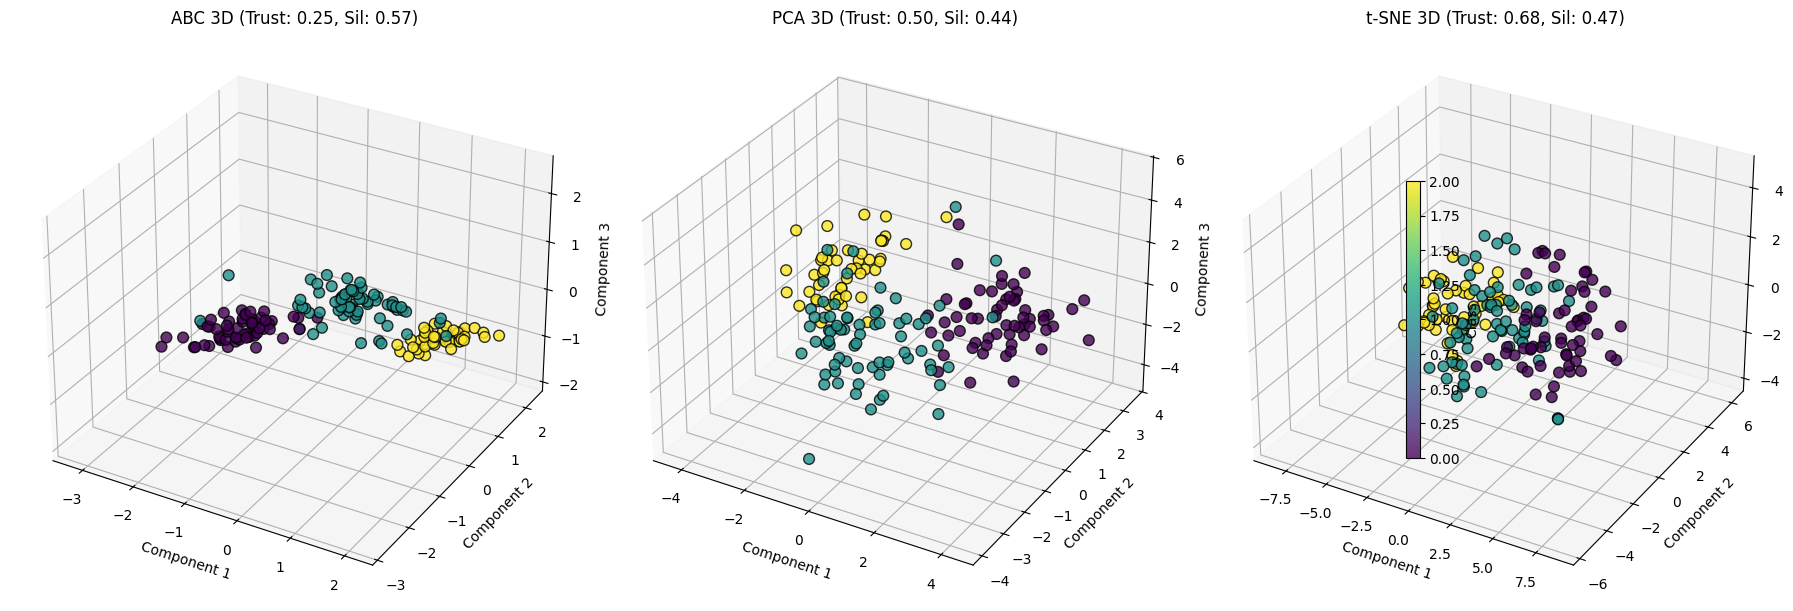

In [ ]:
fig = plt.figure(figsize=(18, 6))

# ABC 3D plot
ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(X_abc_3d[:, 0], X_abc_3d[:, 1], X_abc_3d[:, 2], c=y, cmap='viridis', edgecolor='k', s=60, alpha=0.8)
ax1.set_title(f"ABC 3D (Trust: {abc_3d_metrics['trustworthiness']:.2f}, Sil: {abc_3d_metrics['silhouette_score']:.2f})")
ax1.set_xlabel('Component 1')
ax1.set_ylabel('Component 2')
ax1.set_zlabel('Component 3')

# PCA 3D plot
ax2 = fig.add_subplot(132, projection='3d')
scatter2 = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', edgecolor='k', s=60, alpha=0.8)
ax2.set_title(f"PCA 3D (Trust: {pca_3d_metrics['trustworthiness']:.2f}, Sil: {pca_3d_metrics['silhouette_score']:.2f})")
ax2.set_xlabel('Component 1')
ax2.set_ylabel('Component 2')
ax2.set_zlabel('Component 3')

# t-SNE 3D plot
ax3 = fig.add_subplot(133, projection='3d')
scatter3 = ax3.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=y, cmap='viridis', edgecolor='k', s=60, alpha=0.8)
ax3.set_title(f"t-SNE 3D (Trust: {tsne_3d_metrics['trustworthiness']:.2f}, Sil: {tsne_3d_metrics['silhouette_score']:.2f})")
ax3.set_xlabel('Component 1')
ax3.set_ylabel('Component 2')
ax3.set_zlabel('Component 3')

# Add a colorbar
cbar = fig.colorbar(scatter1, ax=[ax1, ax2, ax3], orientation='vertical', shrink=0.6)
cbar.set_label('Class')

plt.tight_layout()
plt.show()

### *Implement Additional Nature-Inspired Algorithm - Particle Swarm Optimization (PSO)*

In [ ]:
class PSODimensionalityReduction:
    """
    Particle Swarm Optimization algorithm for dimensionality reduction
    """
    def __init__(self, n_components=2, n_particles=50, max_iter=100, w=0.7, c1=1.5, c2=1.5):
        """
        Initialize the PSO algorithm for dimensionality reduction

        Parameters:
        -----------
        n_components : int
            Number of components in the reduced space (default: 2)
        n_particles : int
            Number of particles in the swarm (default: 50)
        max_iter : int
            Maximum number of iterations (default: 100)
        w : float
            Inertia weight (default: 0.7)
        c1 : float
            Cognitive coefficient (default: 1.5)
        c2 : float
            Social coefficient (default: 1.5)
        """
        self.n_components = n_components
        self.n_particles = n_particles
        self.max_iter = max_iter
        self.w = w
        self.c1 = c1
        self.c2 = c2
        self.best_solution = None
        self.best_fitness = float('inf')
        self.fitness_history = []

    def fit_transform(self, X):
        """
        Fit the PSO algorithm to the data and transform it to lower dimensions

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Input data

        Returns:
        --------
        X_transformed : array-like, shape (n_samples, n_components)
            Transformed data in the lower-dimensional space
        """
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialize the swarm
        self._initialize_swarm()

        # Main PSO algorithm loop
        for iteration in range(self.max_iter):
            # Update velocities and positions
            self._update_velocities_and_positions()

            # Evaluate fitness and update best positions
            self._evaluate_fitness()

            # Store the best fitness
            self.fitness_history.append(self.best_fitness)

            # Print progress every 10 iterations
            if (iteration + 1) % 10 == 0:
                print(f"Iteration {iteration + 1}/{self.max_iter}, Best Fitness: {self.best_fitness:.4f}")

        # Transform the data using the best solution
        return self._transform(self.X)

    def _initialize_swarm(self):
        """Initialize the swarm with random positions and velocities"""
        # Initialize positions
        self.positions = []
        self.velocities = []
        self.personal_best_positions = []
        self.personal_best_fitnesses = []

        for i in range(self.n_particles):
            # Generate a random projection matrix
            projection_matrix = np.random.uniform(-1, 1, (self.n_features, self.n_components))

            # Normalize the columns of the projection matrix
            for j in range(self.n_components):
                projection_matrix[:, j] = projection_matrix[:, j] / np.sqrt(np.sum(projection_matrix[:, j]**2))

            # Generate a random velocity matrix
            velocity_matrix = np.random.uniform(-0.1, 0.1, (self.n_features, self.n_components))

            # Calculate fitness
            fitness = self._calculate_fitness(projection_matrix)

            # Store the solution
            self.positions.append(projection_matrix)
            self.velocities.append(velocity_matrix)
            self.personal_best_positions.append(projection_matrix.copy())
            self.personal_best_fitnesses.append(fitness)

            # Update the global best
            if fitness < self.best_fitness:
                self.best_fitness = fitness
                self.best_solution = projection_matrix.copy()

    def _update_velocities_and_positions(self):
        """Update the velocities and positions of all particles"""
        for i in range(self.n_particles):
            # Generate random coefficients
            r1 = np.random.random((self.n_features, self.n_components))
            r2 = np.random.random((self.n_features, self.n_components))

            # Update velocity
            cognitive_component = self.c1 * r1 * (self.personal_best_positions[i] - self.positions[i])
            social_component = self.c2 * r2 * (self.best_solution - self.positions[i])

            self.velocities[i] = self.w * self.velocities[i] + cognitive_component + social_component

            # Update position
            self.positions[i] = self.positions[i] + self.velocities[i]

            # Normalize the columns of the projection matrix
            for j in range(self.n_components):
                self.positions[i][:, j] = self.positions[i][:, j] / np.sqrt(np.sum(self.positions[i][:, j]**2))

    def _evaluate_fitness(self):
        """Evaluate the fitness of all particles and update best positions"""
        for i in range(self.n_particles):
            # Calculate fitness
            fitness = self._calculate_fitness(self.positions[i])

            # Update personal best
            if fitness < self.personal_best_fitnesses[i]:
                self.personal_best_positions[i] = self.positions[i].copy()
                self.personal_best_fitnesses[i] = fitness

                # Update global best
                if fitness < self.best_fitness:
                    self.best_fitness = fitness
                    self.best_solution = self.positions[i].copy()

    def _calculate_fitness(self, projection_matrix):
        """
        Calculate the fitness of a solution

        The fitness is a combination of:
        1. Structure preservation - measured by trustworthiness
        2. Cluster preservation - measured by silhouette score
        """
        # Transform the data
        X_transformed = self.X @ projection_matrix

        # Calculate trustworthiness
        trustworthiness = self._calculate_trustworthiness(self.X, X_transformed, k=10)

        # Apply K-means clustering
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=1)
        kmeans.fit(X_transformed)
        labels = kmeans.labels_

        # Calculate silhouette score
        try:
            sil_score = silhouette_score(X_transformed, labels)
        except:
            sil_score = -1  # If only one cluster is found

        # Combined fitness (maximize trustworthiness and silhouette score)
        fitness = -0.7 * trustworthiness - 0.3 * sil_score

        return fitness

    def _calculate_trustworthiness(self, X_high, X_low, k=5):
        """
        Calculate the trustworthiness of a dimensionality reduction

        Parameters:
        -----------
        X_high : array-like, shape (n_samples, n_features)
            High-dimensional data
        X_low : array-like, shape (n_samples, n_components)
            Low-dimensional data
        k : int
            Number of nearest neighbors to consider (default: 5)

        Returns:
        --------
        trustworthiness : float
            Trustworthiness score (0-1)
        """
        n_samples = X_high.shape[0]

        # Find k-nearest neighbors in the high-dimensional space
        nn_high = NearestNeighbors(n_neighbors=k+1).fit(X_high)
        _, indices_high = nn_high.kneighbors(X_high)

        # Find k-nearest neighbors in the low-dimensional space
        nn_low = NearestNeighbors(n_neighbors=k+1).fit(X_low)
        _, indices_low = nn_low.kneighbors(X_low)

        # Calculate trustworthiness
        trustworthiness = 0
        for i in range(n_samples):
            # Get the k-nearest neighbors (excluding the point itself)
            neighbors_high = set(indices_high[i, 1:k+1])
            neighbors_low = set(indices_low[i, 1:k+1])

            # Find neighbors in the low-dimensional space that are not neighbors in the high-dimensional space
            non_neighbors_high = neighbors_low - neighbors_high

            # Calculate the penalty
            penalty = 0
            for j in non_neighbors_high:
                # Find the rank of j in the high-dimensional space
                rank = np.where(indices_high[i] == j)[0]
                if len(rank) > 0:
                    penalty += (rank[0] - k)

            trustworthiness += penalty

        # Normalize trustworthiness
        n = n_samples * k * (2 * n_samples - 3 * k - 1) / 2
        trustworthiness = 1 - trustworthiness / n

        return trustworthiness

    def _transform(self, X):
        """
        Transform the data using the best projection matrix

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Input data

        Returns:
        --------
        X_transformed : array-like, shape (n_samples, n_components)
            Transformed data in the lower-dimensional space
        """
        return X @ self.best_solution

### *Implement Self-Organizing Maps (SOM) for Dimensionality Reduction*

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=9dfdc7a1f401b96053a5fb5a86f2aed6e7f297cffce06ee97ece3e44b560a174
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [ ]:
from minisom import MiniSom  # You may need to install this: pip install minisom

class SOMDimensionalityReduction:
    """
    Self-Organizing Map for dimensionality reduction
    """
    def __init__(self, n_components=2, grid_size=10, sigma=1.0, learning_rate=0.5, n_iterations=1000):
        """
        Initialize the SOM algorithm for dimensionality reduction

        Parameters:
        -----------
        n_components : int
            Number of components in the reduced space (default: 2)
        grid_size : int
            Size of the SOM grid (default: 10)
        sigma : float
            Spread of the neighborhood function (default: 1.0)
        learning_rate : float
            Learning rate (default: 0.5)
        n_iterations : int
            Number of iterations (default: 1000)
        """
        self.n_components = n_components
        self.grid_size = grid_size
        self.sigma = sigma
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit_transform(self, X):
        """
        Fit the SOM algorithm to the data and transform it to lower dimensions

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Input data

        Returns:
        --------
        X_transformed : array-like, shape (n_samples, n_components)
            Transformed data in the lower-dimensional space
        """
        # Initialize the SOM
        self.som = MiniSom(self.grid_size, self.grid_size, X.shape[1],
                          sigma=self.sigma, learning_rate=self.learning_rate,
                          random_seed=42)

        # Initialize the weights
        self.som.random_weights_init(X)

        # Train the SOM
        print(f"Training SOM for {self.n_iterations} iterations...")
        self.som.train(X, self.n_iterations)
        print("SOM training completed")

        # Get the mapped positions
        X_transformed = np.zeros((X.shape[0], 2))
        for i, x in enumerate(X):
            # Find the winner unit
            winner = self.som.winner(x)
            # Store the 2D coordinates of the winner
            X_transformed[i] = winner

        # For 3D mapping, add a third dimension
        if self.n_components == 3:
            # We can use the distance to the winner as the third dimension
            X_transformed_3d = np.zeros((X.shape[0], 3))
            X_transformed_3d[:, :2] = X_transformed

            for i, x in enumerate(X):
                winner = self.som.winner(x)
                # Use the distance to the winner as the third dimension
                X_transformed_3d[i, 2] = np.linalg.norm(x - self.som.get_weights()[winner])

            return X_transformed_3d

        return X_transformed

### *Implement Firefly Algorithm for Dimensionality Reduction*

In [ ]:
class FireflyDimensionalityReduction:
    """
    Firefly Algorithm for dimensionality reduction
    """
    def __init__(self, n_components=2, n_fireflies=50, max_iter=100, alpha=0.5, beta0=1.0, gamma=1.0):
        """
        Initialize the Firefly Algorithm for dimensionality reduction

        Parameters:
        -----------
        n_components : int
            Number of components in the reduced space (default: 2)
        n_fireflies : int
            Number of fireflies in the swarm (default: 50)
        max_iter : int
            Maximum number of iterations (default: 100)
        alpha : float
            Randomization parameter (default: 0.5)
        beta0 : float
            Attractiveness at distance 0 (default: 1.0)
        gamma : float
            Light absorption coefficient (default: 1.0)
        """
        self.n_components = n_components
        self.n_fireflies = n_fireflies
        self.max_iter = max_iter
        self.alpha = alpha
        self.beta0 = beta0
        self.gamma = gamma
        self.best_solution = None
        self.best_fitness = float('inf')
        self.fitness_history = []

    def fit_transform(self, X):
        """
        Fit the Firefly Algorithm to the data and transform it to lower dimensions

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Input data

        Returns:
        --------
        X_transformed : array-like, shape (n_samples, n_components)
            Transformed data in the lower-dimensional space
        """
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialize the fireflies
        self._initialize_fireflies()

        # Main Firefly Algorithm loop
        for iteration in range(self.max_iter):
            # Move fireflies
            self._move_fireflies()

            # Update alpha
            self.alpha *= 0.97  # Reduce alpha over time

            # Store the best fitness
            self.fitness_history.append(self.best_fitness)

            # Print progress every 10 iterations
            if (iteration + 1) % 10 == 0:
                print(f"Iteration {iteration + 1}/{self.max_iter}, Best Fitness: {self.best_fitness:.4f}")

        # Transform the data using the best solution
        return self._transform(self.X)

    def _initialize_fireflies(self):
        """Initialize the fireflies with random positions"""
        self.fireflies = []
        self.intensities = []

        for i in range(self.n_fireflies):
            # Generate a random projection matrix
            projection_matrix = np.random.uniform(-1, 1, (self.n_features, self.n_components))

            # Normalize the columns of the projection matrix
            for j in range(self.n_components):
                projection_matrix[:, j] = projection_matrix[:, j] / np.sqrt(np.sum(projection_matrix[:, j]**2))

            # Calculate fitness (intensity)
            fitness = self._calculate_fitness(projection_matrix)

            # Store the solution
            self.fireflies.append(projection_matrix)
            self.intensities.append(fitness)

            # Update the best solution
            if fitness < self.best_fitness:
                self.best_fitness = fitness
                self.best_solution = projection_matrix.copy()

    def _move_fireflies(self):
        """Move fireflies towards brighter ones"""
        for i in range(self.n_fireflies):
            for j in range(self.n_fireflies):
                # Firefly j is brighter than firefly i
                if self.intensities[j] < self.intensities[i]:
                    # Calculate distance
                    r = np.sqrt(np.sum((self.fireflies[i] - self.fireflies[j])**2))

                    # Calculate attractiveness
                    beta = self.beta0 * np.exp(-self.gamma * r**2)

                    # Move firefly i towards j
                    self.fireflies[i] = self.fireflies[i] + beta * (self.fireflies[j] - self.fireflies[i]) + \
                                        self.alpha * (np.random.rand(self.n_features, self.n_components) - 0.5)

                    # Normalize the columns of the projection matrix
                    for k in range(self.n_components):
                        self.fireflies[i][:, k] = self.fireflies[i][:, k] / np.sqrt(np.sum(self.fireflies[i][:, k]**2))

                    # Update intensity
                    self.intensities[i] = self._calculate_fitness(self.fireflies[i])

                    # Update the best solution
                    if self.intensities[i] < self.best_fitness:
                        self.best_fitness = self.intensities[i]
                        self.best_solution = self.fireflies[i].copy()

    def _calculate_fitness(self, projection_matrix):
        """
        Calculate the fitness of a solution

        The fitness is a combination of:
        1. Structure preservation - measured by trustworthiness
        2. Cluster preservation - measured by silhouette score
        """
        # Transform the data
        X_transformed = self.X @ projection_matrix

        # Calculate trustworthiness
        trustworthiness = self._calculate_trustworthiness(self.X, X_transformed, k=10)

        # Apply K-means clustering
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=1)
        kmeans.fit(X_transformed)
        labels = kmeans.labels_

        # Calculate silhouette score
        try:
            sil_score = silhouette_score(X_transformed, labels)
        except:
            sil_score = -1  # If only one cluster is found

        # Combined fitness (maximize trustworthiness and silhouette score)
        fitness = -0.7 * trustworthiness - 0.3 * sil_score

        return fitness

    def _calculate_trustworthiness(self, X_high, X_low, k=5):
        """Calculate the trustworthiness of a dimensionality reduction"""
        n_samples = X_high.shape[0]

        # Find k-nearest neighbors in the high-dimensional space
        nn_high = NearestNeighbors(n_neighbors=k+1).fit(X_high)
        _, indices_high = nn_high.kneighbors(X_high)

        # Find k-nearest neighbors in the low-dimensional space
        nn_low = NearestNeighbors(n_neighbors=k+1).fit(X_low)
        _, indices_low = nn_low.kneighbors(X_low)

        # Calculate trustworthiness
        trustworthiness = 0
        for i in range(n_samples):
            # Get the k-nearest neighbors (excluding the point itself)
            neighbors_high = set(indices_high[i, 1:k+1])
            neighbors_low = set(indices_low[i, 1:k+1])

            # Find neighbors in the low-dimensional space that are not neighbors in the high-dimensional space
            non_neighbors_high = neighbors_low - neighbors_high

            # Calculate the penalty
            penalty = 0
            for j in non_neighbors_high:
                # Find the rank of j in the high-dimensional space
                rank = np.where(indices_high[i] == j)[0]
                if len(rank) > 0:
                    penalty += (rank[0] - k)

            trustworthiness += penalty

        # Normalize trustworthiness
        n = n_samples * k * (2 * n_samples - 3 * k - 1) / 2
        trustworthiness = 1 - trustworthiness / n

        return trustworthiness

    def _transform(self, X):
        """Transform the data using the best projection matrix"""
        return X @ self.best_solution

### *BA for Dimensionality Reduction*

In [ ]:
class BatDimensionalityReduction:
    """
    Bat Algorithm for dimensionality reduction.
    Inspired by the echolocation behavior of bats.
    """
    def __init__(self, n_components=2, n_bats=50, max_iter=100, fmin=0, fmax=2, alpha=0.9, gamma=0.9):
        self.n_components = n_components
        self.n_bats = n_bats
        self.max_iter = max_iter
        self.fmin = fmin
        self.fmax = fmax
        self.alpha = alpha  # Loudness decay
        self.gamma = gamma  # Pulse rate increase
        self.best_solution = None
        self.best_fitness = float('inf')
        self.fitness_history = []

    def fit_transform(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialize bats
        self._initialize_bats()

        for iteration in range(self.max_iter):
            self._update_bats(iteration)

            self.fitness_history.append(self.best_fitness)
            if (iteration + 1) % 10 == 0:
                print(f"Iteration {iteration + 1}/{self.max_iter}, Best Fitness: {self.best_fitness:.4f}")

        return self._transform(self.X)

    def _initialize_bats(self):
        self.positions = []
        self.velocities = []
        self.frequencies = np.zeros(self.n_bats)
        self.pulse_rates = np.random.rand(self.n_bats)
        self.loudness = np.ones(self.n_bats)
        self.personal_best_positions = []
        self.personal_best_fitnesses = []

        for i in range(self.n_bats):
            position = np.random.uniform(-1, 1, (self.n_features, self.n_components))
            for j in range(self.n_components):
                position[:, j] /= np.linalg.norm(position[:, j]) + 1e-10

            velocity = np.zeros_like(position)
            fitness = self._calculate_fitness(position)

            self.positions.append(position)
            self.velocities.append(velocity)
            self.personal_best_positions.append(position.copy())
            self.personal_best_fitnesses.append(fitness)

            if fitness < self.best_fitness:
                self.best_fitness = fitness
                self.best_solution = position.copy()

    def _update_bats(self, t):
        for i in range(self.n_bats):
            # Update frequency
            beta = np.random.rand()
            self.frequencies[i] = self.fmin + (self.fmax - self.fmin) * beta

            # Update velocity and position
            self.velocities[i] += (self.positions[i] - self.best_solution) * self.frequencies[i]
            new_position = self.positions[i] + self.velocities[i]

            # Normalize projection columns
            for j in range(self.n_components):
                new_position[:, j] /= np.linalg.norm(new_position[:, j]) + 1e-10

            # Local random walk with probability
            if np.random.rand() > self.pulse_rates[i]:
                epsilon = np.random.uniform(-1, 1, new_position.shape)
                new_position = self.best_solution + epsilon * np.mean(self.loudness)

            new_fitness = self._calculate_fitness(new_position)

            # Acceptance criteria
            if (new_fitness < self.personal_best_fitnesses[i]) and (np.random.rand() < self.loudness[i]):
                self.positions[i] = new_position
                self.personal_best_positions[i] = new_position
                self.personal_best_fitnesses[i] = new_fitness
                self.loudness[i] *= self.alpha
                self.pulse_rates[i] = self.pulse_rates[i] * (1 - np.exp(-self.gamma * t))

                if new_fitness < self.best_fitness:
                    self.best_fitness = new_fitness
                    self.best_solution = new_position.copy()

    def _calculate_fitness(self, projection_matrix):
        X_transformed = self.X @ projection_matrix
        trustworthiness = self._calculate_trustworthiness(self.X, X_transformed, k=10)

        kmeans = KMeans(n_clusters=3, random_state=42, n_init=1)
        kmeans.fit(X_transformed)
        labels = kmeans.labels_

        try:
            sil_score = silhouette_score(X_transformed, labels)
        except:
            sil_score = -1

        fitness = -0.7 * trustworthiness - 0.3 * sil_score
        return fitness

    def _calculate_trustworthiness(self, X_high, X_low, k=5):
        n_samples = X_high.shape[0]
        nn_high = NearestNeighbors(n_neighbors=k+1).fit(X_high)
        _, indices_high = nn_high.kneighbors(X_high)

        nn_low = NearestNeighbors(n_neighbors=k+1).fit(X_low)
        _, indices_low = nn_low.kneighbors(X_low)

        trustworthiness = 0
        for i in range(n_samples):
            neighbors_high = set(indices_high[i, 1:k+1])
            neighbors_low = set(indices_low[i, 1:k+1])
            non_neighbors_high = neighbors_low - neighbors_high

            penalty = 0
            for j in non_neighbors_high:
                rank = np.where(indices_high[i] == j)[0]
                if len(rank) > 0:
                    penalty += (rank[0] - k)

            trustworthiness += penalty

        n = n_samples * k * (2 * n_samples - 3 * k - 1) / 2
        trustworthiness = 1 - trustworthiness / n
        return trustworthiness

    def _transform(self, X):
        return X @ self.best_solution

### *ACO for Dimensionality Reduction*

In [ ]:
class ACODimensionalityReduction:
    """
    Ant Colony Optimization algorithm for dimensionality reduction
    """

    def __init__(self, n_components=2, n_ants=50, max_iter=100, alpha=1, beta=2, evaporation_rate=0.5, q=1.0):
        """
        Initialize ACO algorithm

        Parameters:
        -----------
        n_components : int
            Number of reduced dimensions
        n_ants : int
            Number of ants in the colony
        max_iter : int
            Maximum number of iterations
        alpha : float
            Influence of pheromone
        beta : float
            Influence of heuristic
        evaporation_rate : float
            Pheromone evaporation rate
        q : float
            Pheromone deposit factor
        """
        self.n_components = n_components
        self.n_ants = n_ants
        self.max_iter = max_iter
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.q = q

        self.best_solution = None
        self.best_fitness = float('inf')
        self.fitness_history = []

    def fit_transform(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Initialize pheromone levels
        self.pheromone = np.ones((self.n_features, self.n_components))

        for iteration in range(self.max_iter):
            solutions = []
            fitnesses = []

            # Construct solutions
            for _ in range(self.n_ants):
                projection_matrix = self._construct_solution()
                fitness = self._calculate_fitness(projection_matrix)

                solutions.append(projection_matrix)
                fitnesses.append(fitness)

                if fitness < self.best_fitness:
                    self.best_fitness = fitness
                    self.best_solution = projection_matrix.copy()

            self._update_pheromones(solutions, fitnesses)
            self.fitness_history.append(self.best_fitness)

            if (iteration + 1) % 10 == 0:
                print(f"Iteration {iteration + 1}/{self.max_iter}, Best Fitness: {self.best_fitness:.4f}")

        return self._transform(self.X)

    def _construct_solution(self):
        projection_matrix = np.zeros((self.n_features, self.n_components))
        for j in range(self.n_components):
            probs = (self.pheromone[:, j] ** self.alpha) * (np.random.rand(self.n_features) ** self.beta)
            probs /= probs.sum()
            for i in range(self.n_features):
                projection_matrix[i, j] = np.random.choice([-1, 1]) * probs[i]

        # Normalize columns
        for j in range(self.n_components):
            norm = np.linalg.norm(projection_matrix[:, j])
            if norm != 0:
                projection_matrix[:, j] /= norm
        return projection_matrix

    def _update_pheromones(self, solutions, fitnesses):
        # Evaporate
        self.pheromone *= (1 - self.evaporation_rate)

        # Deposit
        for proj_matrix, fitness in zip(solutions, fitnesses):
            for j in range(self.n_components):
                self.pheromone[:, j] += self.q / (1e-6 + fitness) * np.abs(proj_matrix[:, j])

    def _calculate_fitness(self, projection_matrix):
        X_transformed = self.X @ projection_matrix
        trust = self._calculate_trustworthiness(self.X, X_transformed, k=10)

        kmeans = KMeans(n_clusters=3, random_state=42, n_init=1)
        kmeans.fit(X_transformed)
        labels = kmeans.labels_

        try:
            silhouette = silhouette_score(X_transformed, labels)
        except:
            silhouette = -1

        fitness = -0.7 * trust - 0.3 * silhouette
        return fitness

    def _calculate_trustworthiness(self, X_high, X_low, k=5):
        n_samples = X_high.shape[0]
        nn_high = NearestNeighbors(n_neighbors=k+1).fit(X_high)
        _, indices_high = nn_high.kneighbors(X_high)

        nn_low = NearestNeighbors(n_neighbors=k+1).fit(X_low)
        _, indices_low = nn_low.kneighbors(X_low)

        trustworthiness = 0
        for i in range(n_samples):
            high = set(indices_high[i, 1:k+1])
            low = set(indices_low[i, 1:k+1])
            non_neighbors = low - high
            penalty = sum([(np.where(indices_high[i] == j)[0][0] - k) for j in non_neighbors if len(np.where(indices_high[i] == j)[0]) > 0])
            trustworthiness += penalty

        n = n_samples * k * (2 * n_samples - 3 * k - 1) / 2
        return 1 - trustworthiness / n

    def _transform(self, X):
        return X @ self.best_solution

### *PSO for Dimensionality Reduction*
> Set parameters for the PSO algorithm

In [ ]:
n_components = 2
n_particles = 50
max_iter = 100
w = 0.7
c1 = 1.5
c2 = 1.5

In [ ]:
print(f"Running PSO dimensionality reduction (n_particles={n_particles}, max_iter={max_iter})...")
start_time = time.time()
pso = PSODimensionalityReduction(n_components=n_components, n_particles=n_particles,
                                max_iter=max_iter, w=w, c1=c1, c2=c2)
X_pso = pso.fit_transform(X_scaled)
pso_time = time.time() - start_time
print(f"PSO completed in {pso_time:.2f} seconds")

Running PSO dimensionality reduction (n_particles=50, max_iter=100)...
Iteration 10/100, Best Fitness: -0.8873
Iteration 20/100, Best Fitness: -0.8962
Iteration 30/100, Best Fitness: -0.8996
Iteration 40/100, Best Fitness: -0.9005
Iteration 50/100, Best Fitness: -0.9013
Iteration 60/100, Best Fitness: -0.9019
Iteration 70/100, Best Fitness: -0.9023
Iteration 80/100, Best Fitness: -0.9024
Iteration 90/100, Best Fitness: -0.9026
Iteration 100/100, Best Fitness: -0.9027
PSO completed in 51.35 seconds


### *Firefly Algorithm for Dimensionality Reduction*
> Set parameters for the Firefly Algorithm

In [ ]:
n_components = 2
n_fireflies = 50
max_iter = 100
alpha = 0.5
beta0 = 1.0
gamma = 1.0

In [ ]:
print(f"Running Firefly Algorithm for dimensionality reduction (n_fireflies={n_fireflies}, max_iter={max_iter})...")
start_time = time.time()
firefly = FireflyDimensionalityReduction(n_components=n_components, n_fireflies=n_fireflies,
                                         max_iter=max_iter, alpha=alpha, beta0=beta0, gamma=gamma)
X_firefly = firefly.fit_transform(X_scaled)
firefly_time = time.time() - start_time
print(f"Firefly Algorithm completed in {firefly_time:.2f} seconds")

Running Firefly Algorithm for dimensionality reduction (n_fireflies=50, max_iter=100)...
Iteration 10/100, Best Fitness: -0.8860
Iteration 20/100, Best Fitness: -0.8983
Iteration 30/100, Best Fitness: -0.9007
Iteration 40/100, Best Fitness: -0.9018
Iteration 50/100, Best Fitness: -0.9026
Iteration 60/100, Best Fitness: -0.9032
Iteration 70/100, Best Fitness: -0.9032
Iteration 80/100, Best Fitness: -0.9035
Iteration 90/100, Best Fitness: -0.9036
Iteration 100/100, Best Fitness: -0.9037
Firefly Algorithm completed in 1212.88 seconds


### *SOM for Dimensionality Reduction*
> Set parameters for the SOM

In [ ]:
n_components = 2
grid_size = 10
sigma = 1.0
learning_rate = 0.5
n_iterations = 1000

In [ ]:
print(f"Running SOM dimensionality reduction (grid_size={grid_size}, n_iterations={n_iterations})...")
start_time = time.time()
som = SOMDimensionalityReduction(n_components=n_components, grid_size=grid_size,
                                sigma=sigma, learning_rate=learning_rate, n_iterations=n_iterations)
X_som = som.fit_transform(X_scaled)
som_time = time.time() - start_time
print(f"SOM completed in {som_time:.2f} seconds")

Running SOM dimensionality reduction (grid_size=10, n_iterations=1000)...
Training SOM for 1000 iterations...
SOM training completed
SOM completed in 0.07 seconds


### *BA for Dimensionality Reduction*
> Set parameters for the BA

In [ ]:
n_components = 2
n_bats = 50
max_iter = 100
fmin = 0
fmax = 2
alpha = 0.9
gamma = 0.9

In [ ]:
print(f"Running BA dimensionality reduction (n_bats={n_bats}, max_iter={max_iter})...")
start_time = time.time()
ba = BatDimensionalityReduction(n_components=n_components, n_bats=n_bats,
                                max_iter=max_iter, fmin=fmin, fmax=fmax, alpha=alpha, gamma=gamma)
X_ba = ba.fit_transform(X_scaled)
ba_time = time.time() - start_time
print(f"BA completed in {ba_time:.2f} seconds")

Running BA dimensionality reduction (n_bats=50, max_iter=100)...
Iteration 10/100, Best Fitness: -0.8677
Iteration 20/100, Best Fitness: -0.8980
Iteration 30/100, Best Fitness: -0.9032
Iteration 40/100, Best Fitness: -0.9038
Iteration 50/100, Best Fitness: -0.9049
Iteration 60/100, Best Fitness: -0.9056
Iteration 70/100, Best Fitness: -0.9057
Iteration 80/100, Best Fitness: -0.9064
Iteration 90/100, Best Fitness: -0.9064
Iteration 100/100, Best Fitness: -0.9064
BA completed in 51.75 seconds


### *ACO for Dimensionality Reduction*
> Set parameters for the ACO

In [ ]:
n_components = 2
n_ants = 50
max_iter = 100

In [ ]:
print(f"Running ACO dimensionality reduction (n_ants={n_ants}, max_iter={max_iter})...")
start_time = time.time()
aco = ACODimensionalityReduction(n_components=n_components, n_ants=n_ants, max_iter=max_iter)
X_aco = aco.fit_transform(X_scaled)
aco_time = time.time() - start_time
print(f"ACO completed in {aco_time:.2f} seconds")

Running ACO dimensionality reduction (n_ants=50, max_iter=100)...
Iteration 10/100, Best Fitness: -0.8552
Iteration 20/100, Best Fitness: -0.8557
Iteration 30/100, Best Fitness: -0.8567
Iteration 40/100, Best Fitness: -0.8616
Iteration 50/100, Best Fitness: -0.8616
Iteration 60/100, Best Fitness: -0.8616
Iteration 70/100, Best Fitness: -0.8669
Iteration 80/100, Best Fitness: -0.8669
Iteration 90/100, Best Fitness: -0.8669
Iteration 100/100, Best Fitness: -0.8669
ACO completed in 55.51 seconds


### *Evaluate All Methods*

In [ ]:
print("Evaluating all methods...")
pso_metrics = evaluate_dimensionality_reduction(X_scaled, X_pso, y)
firefly_metrics = evaluate_dimensionality_reduction(X_scaled, X_firefly, y)
som_metrics = evaluate_dimensionality_reduction(X_scaled, X_som, y)
ba_metrics = evaluate_dimensionality_reduction(X_scaled, X_ba, y)
pca_metrics = evaluate_dimensionality_reduction(X_scaled, X_pca, y)
tsne_metrics = evaluate_dimensionality_reduction(X_scaled, X_tsne, y)
abc_metrics = evaluate_dimensionality_reduction(X_scaled, X_abc, y)
aco_metrics = evaluate_dimensionality_reduction(X_scaled, X_aco, y)

print("\nEvaluation Metrics:")
print(f"ABC - Trustworthiness: {abc_metrics['trustworthiness']:.4f}, Silhouette Score: {abc_metrics['silhouette_score']:.4f}")
print(f"PSO - Trustworthiness: {pso_metrics['trustworthiness']:.4f}, Silhouette Score: {pso_metrics['silhouette_score']:.4f}")
print(f"Firefly - Trustworthiness: {firefly_metrics['trustworthiness']:.4f}, Silhouette Score: {firefly_metrics['silhouette_score']:.4f}")
print(f"SOM - Trustworthiness: {som_metrics['trustworthiness']:.4f}, Silhouette Score: {som_metrics['silhouette_score']:.4f}")
print(f"BA - Trustworthiness: {ba_metrics['trustworthiness']:.4f}, Silhouette Score: {ba_metrics['silhouette_score']:.4f}")
print(f"PCA - Trustworthiness: {pca_metrics['trustworthiness']:.4f}, Silhouette Score: {pca_metrics['silhouette_score']:.4f}")
print(f"t-SNE - Trustworthiness: {tsne_metrics['trustworthiness']:.4f}, Silhouette Score: {tsne_metrics['silhouette_score']:.4f}")
print(f"ACO - Trustworthiness: {aco_metrics['trustworthiness']:.4f}, Silhouette Score: {aco_metrics['silhouette_score']:.4f}")

Evaluating all methods...

Evaluation Metrics:
ABC - Trustworthiness: 0.1669, Silhouette Score: 0.1853
PSO - Trustworthiness: 0.1736, Silhouette Score: 0.2290
Firefly - Trustworthiness: 0.2539, Silhouette Score: 0.6387
SOM - Trustworthiness: 0.3927, Silhouette Score: 0.0819
BA - Trustworthiness: 0.2281, Silhouette Score: 0.5632
PCA - Trustworthiness: 0.3697, Silhouette Score: 0.5262
t-SNE - Trustworthiness: 0.6067, Silhouette Score: 0.5520
ACO - Trustworthiness: 0.2697, Silhouette Score: 0.2877


### *Visualization - Compare All Methods*

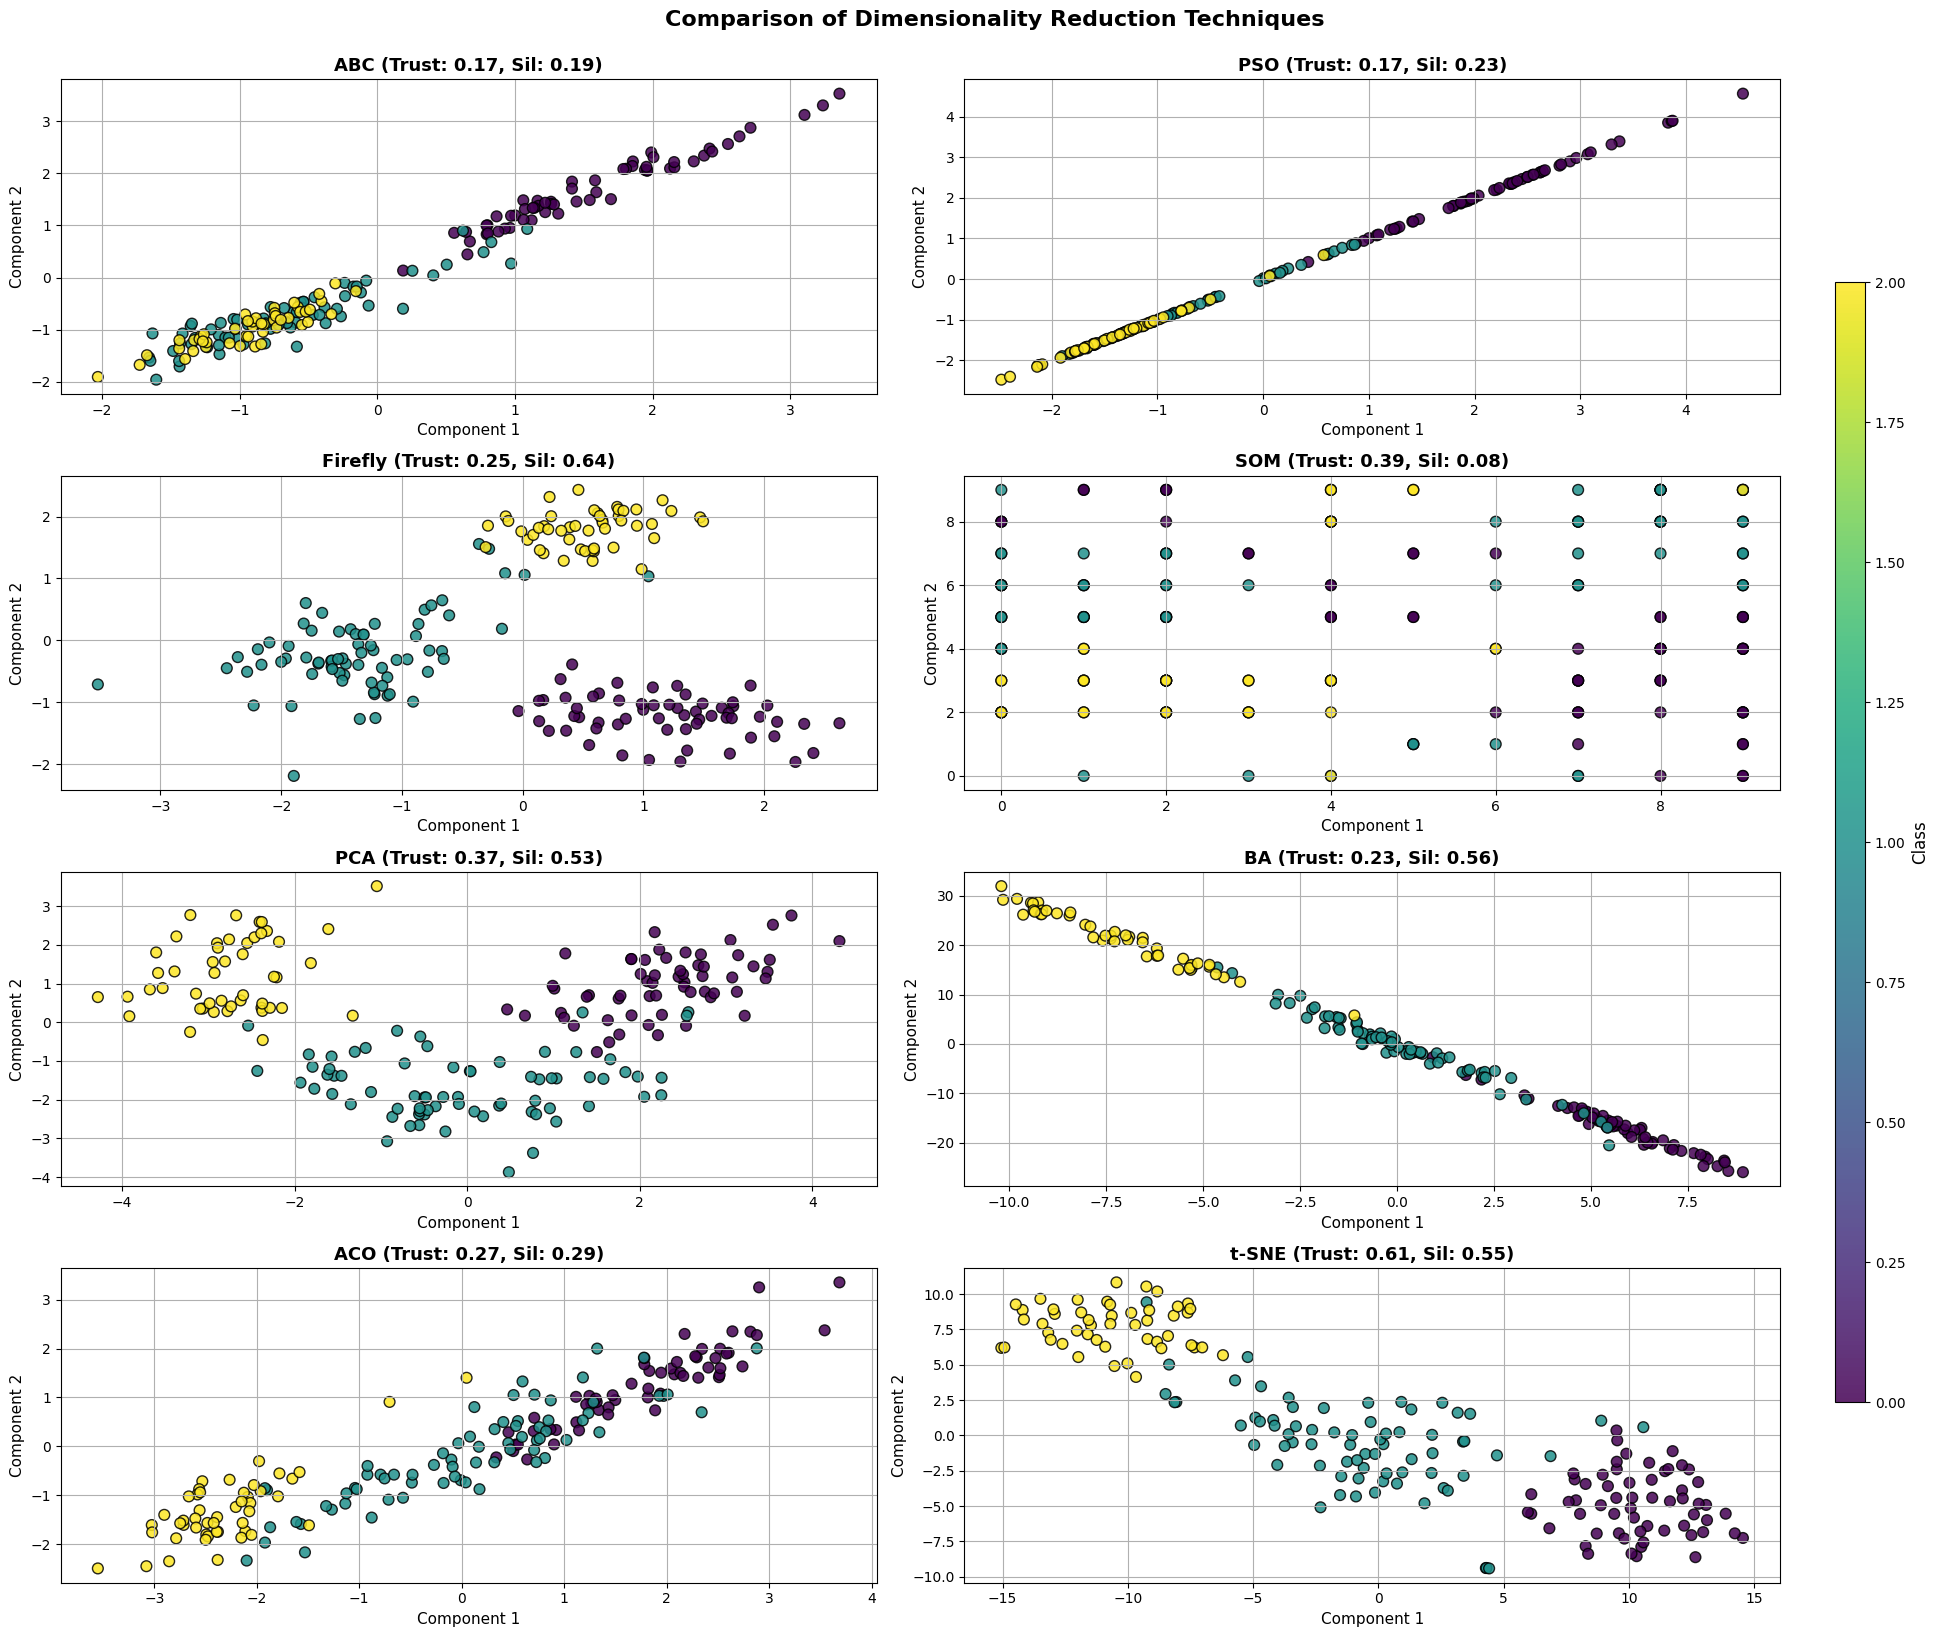

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create a figure with 4x2 subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 16))
axes = axes.flatten()

titles = [
    ("ABC", abc_metrics),
    ("PSO", pso_metrics),
    ("Firefly", firefly_metrics),
    ("SOM", som_metrics),
    ("PCA", pca_metrics),
    ("BA", ba_metrics),
    ("ACO", aco_metrics),
    ("t-SNE", tsne_metrics)
]

data = [
    X_abc, X_pso, X_firefly, X_som,
    X_pca, X_ba, X_aco, X_tsne
]

# Store last scatter for colorbar
scatter = None

# Plot each projection
for i, ax in enumerate(axes):
    X_method = data[i]
    method_name, metrics = titles[i]

    scatter = ax.scatter(
        X_method[:, 0], X_method[:, 1],
        c=y, cmap='viridis', edgecolor='k', s=60, alpha=0.85
    )
    ax.set_title(
        f"{method_name} (Trust: {metrics['trustworthiness']:.2f}, Sil: {metrics['silhouette_score']:.2f})",
        fontsize=13, fontweight='bold'
    )
    ax.set_xlabel('Component 1', fontsize=11)
    ax.set_ylabel('Component 2', fontsize=11)
    ax.grid(True)

# Create a colorbar axis at the right of all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Class', fontsize=12)

# Final layout adjustments
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for colorbar
plt.suptitle("Comparison of Dimensionality Reduction Techniques", fontsize=16, fontweight='bold', y=1.02)
plt.show()